# Project Objective

As the world increasingly transitions to online communication, the use of emails has surged. Emails have become an integral part of business communication, serving as a vital tool for sending files across the globe. However, not all emails carry equal importance; distinguishing between essential and less significant emails is crucial.

Just as the use of computers and the internet has expanded, the influx of information and websites has grown significantly. From e-commerce platforms to social media, news outlets, educational sites, banking services, job portals, and subscription platforms, the online landscape is vast. Sometimes, signing up for a service or platform may lead to an inundation of marketing emails, even if your intention was to use it only momentarily. Moreover, instances of data breaches can expose individuals to unwanted emails. Preventing such occurrences is essential, and it falls upon email service providers to effectively filter out these unwanted messages.

This project aims to develop a model capable of efficiently identifying and filtering spam emails. It will employ natural language processing techniques to achieve this goal.

# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Python module to work with regular expressions ('regex')

import nltk
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nene0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Acquisition

In [2]:
email = pd.read_csv(r"C:\Users\nene0\Documents\Datasets\spam_ham\spam.csv", encoding='latin-1')
email.dropna(axis=1, how='any', inplace=True)
email.columns = ['label', 'text']

In [3]:
email

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


# Data Analysis

In [4]:
email.sample(10, random_state=42)

,label,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens"
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones"
1044,spam,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p"
2484,ham,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
812,spam,Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
2973,ham,"I'll text carlos and let you know, hang on"
2991,ham,K.i did't see you.:)k:)where are you now?
2942,ham,No message..no responce..what happend?
230,ham,Get down in gandhipuram and walk to cross cut road. Right side &lt;#&gt; street road and turn at first right.
1181,ham,You flippin your shit yet?


In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
email.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
email['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
email[email['text']=="Sorry, I'll call later"]['label'].value_counts()

label
ham    30
Name: count, dtype: int64

In [9]:
email[email['label']=="spam"].sample(10, random_state=0)

,label,text
1847,spam,"FREE NOKIA Or Motorola with upto 12mths 1/2price linerental, 500 FREE x-net mins&100txt/mth FREE B'tooth*. Call Mobileupd8 on 08001950382 or call 2optout/D3WV"
3911,spam,You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!
68,spam,"Did you hear about the new \Divorce Barbie\""? It comes with all of Ken's stuff!"""
187,spam,Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!
3799,spam,We tried to contact you re your reply to our offer of a Video Handset? 750 anytime any networks mins? UNLIMITED TEXT? Camcorder? Reply or call 08000930705 NOW
540,spam,from www.Applausestore.com MonthlySubscription@50p/msg max6/month T&CsC web age16 2stop txt stop
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU"
3528,spam,"Xmas & New Years Eve tickets are now on sale from the club, during the day from 10am till 8pm, and on Thurs, Fri & Sat night this week. They're selling fast!"
159,spam,You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810


In [10]:
email[email['label']=="ham"].sample(10, random_state=0)

,label,text
3031,ham,Jokin only lar... :-) depends on which phone my father can get lor...
4932,ham,Once free call me sir.
5060,ham,"Sorry, I'll call you later. I am in meeting sir."
4008,ham,Ha... Then we must walk to everywhere... Cannot take tram. My cousin said can walk to vic market from our hotel
4230,ham,U really pig leh sleep so much. My dad wake me up at 10 smth 2 eat lunch today.
5509,ham,Lol they were mad at first but then they woke up and gave in.
5552,ham,Have a safe trip to Nigeria. Wish you happiness and very soon company to share moments with
5358,ham,Hmm. Shall i bring a bottle of wine to keep us amused? Just joking! I'll still bring a bottle. Red or white? See you tomorrow
1174,ham,Yay! You better not have told that to 5 other girls either.
859,ham,Did he just say somebody is named tampa


In [11]:
email.groupby('label').describe()

text          
      count unique   
label                
ham    4825   4516  \
spam    747    653   

                                                                                                                                                               
                                                                                                                                                         top   
label                                                                                                                                                          
ham                                                                                                                                   Sorry, I'll call later  \
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!   

            
      freq  
label       
ham     30  
spam     4

In our initial analysis, we uncovered significant factors distinguishing spam from ham emails:

- The dataset displays an imbalance between ham and spam classes, with approximately 87% (4,825) identified as ham and 13% (747) as spam emails.
- The most prevalent ham email message, "Sorry, I'll call later," appears 30 times within this dataset.
- Conversely, the most frequent spam email message, "Please call our customer service representative on FREEPHONE...," is observed 4 times.
- Upon reviewing samples of spam messages, a recurring trend emerges: frequent use of terms like "free" and messaging that claims recipients have won prizes. Additionally, spam messages tend to employ a higher frequency of capitalized words compared to ham emails.
- Notably, the word "call" is present in both spam and ham emails. However, the context differs significantly: spam emails use "call" to urge recipients to contact for prizes or offers, while ham emails employ "call" to request a callback due to missed calls or an inability to make a call at the moment.
- Another noticeable trend is that spam emails tend to be lengthier compared to ham emails. To validate this observation, we can create a new feature that counts the lengths of the messages.

In [12]:
email['txt_length'] = email['text'].apply(len)

In [13]:
email.describe()

,txt_length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [14]:
email.groupby('label')[['txt_length']].agg(['min','max','mean'])

txt_length                 
             min  max        mean
label                            
ham            2  910   71.023627
spam          13  224  138.866131

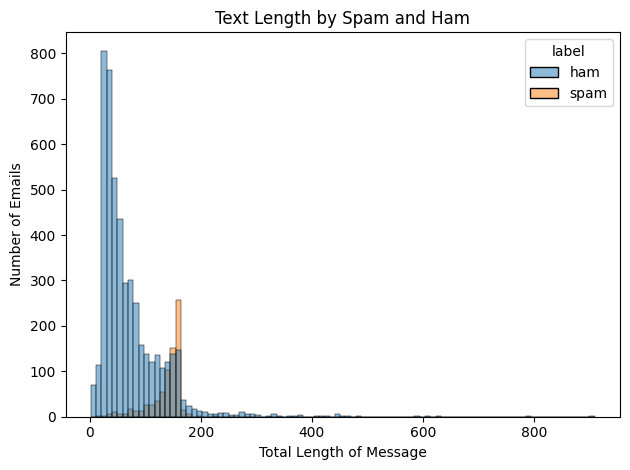

In [15]:
sns.histplot(data=email, x='txt_length', hue='label')
plt.title("Text Length by Spam and Ham")
plt.xlabel("Total Length of Message")
plt.ylabel("Number of Emails")
plt.tight_layout()
plt.show()

The visualization illustrates a prevalent distinction: a majority of ham emails contain fewer than 100 words, whereas spam emails often fall within the range of 100 to 200 words. Utilizing the 'groupby' and aggregation methods, we discern that the minimum length of spam emails is 13, with an average length hovering around 138—noticeably higher than both the minimum and mean lengths of ham emails.

A noteworthy observation is the contrasting lengths of the longest emails: the longest ham email spans 910 words, whereas the lengthiest spam email comprises 224 words.

In [16]:
email[(email['label']=='ham')&(email['txt_length']==910)|(email['label']=='ham')&(email['txt_length']==2)]

,label,text,txt_length
1084,ham,For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..,910
1924,ham,Ok,2
3049,ham,Ok,2
4496,ham,Ok,2
5357,ham,Ok,2


In [17]:
email[(email['label']=='spam')&(email['txt_length']==224)|(email['label']=='spam')&(email['txt_length']==13)]

,label,text,txt_length
1733,spam,"Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive å£5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....",224
3740,spam,2/2 146tf150p,13


The shortest ham email comprises solely the word "Ok," whereas the shortest spam email contains no meaningful content at all. On the other end, the longest ham email appears to delve into the topic of love, resembling an answer to a question, whereas the lengthiest spam email reaffirms the recipient's purported prize-winning status once more.

# Data Preparation

In [18]:
email.head()

,label,text,txt_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [19]:
def clean_text_data(data):
    """This function processes the email text and returns the cleaned text by performing the following steps:
    - Tokenizing the text into words.
    - Removing punctuations using Python's re module.
    - Eliminating stop words.
    - Removing single-letter words.
    - Removing words containing digits."""
    
    word_token = word_tokenize(data) # tokenize the text and returns the list of words
    stop_words = stopwords.words('english') # list of stop words
    clean_text = [re.sub(r'[^\w\s]', '', word) for word in word_token] # remove punctuations
    clean_text = [word for word in clean_text if word.lower() not in stop_words] # remove stop words
    clean_text = [word for word in clean_text if len(word)>2] # remove one letter from text
    clean_text = [word for word in clean_text if not any(char.isdigit() for char in word)] # remove any words with digit
    clean_text = ' '.join(clean_text)
    return clean_text

In [20]:
email['clean_txt'] = email['text'].apply(clean_text_data)

email[['clean_txt']]

,clean_txt
0,jurong point crazy Available bugis great world buffet Cine got amore wat
1,lar Joking wif oni
2,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply
3,dun say early hor already say
4,Nah think goes usf lives around though
...,...
5567,time tried contact Pound prize claim easy call per minute BTnationalrate
5568,going esplanade home
5569,Pity mood suggestions
5570,guy bitching acted like interested buying something else next week gave free


In [21]:
email.head()

,label,text,txt_length,clean_txt
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,jurong point crazy Available bugis great world buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah think goes usf lives around though


In [22]:
def lemmatize_words(data):
    """This function performs lemmatization on the cleaned text."""
    
    lm = WordNetLemmatizer()
    lem_text = lm.lemmatize(data)
    return lem_text

In [23]:
email['lemma_txt'] = email['clean_txt'].apply(lemmatize_words)

In [24]:
email.head()

,label,text,txt_length,clean_txt,lemma_txt
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,jurong point crazy Available bugis great world buffet Cine got amore wat,jurong point crazy Available bugis great world buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,lar Joking wif oni,lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah think goes usf lives around though,Nah think goes usf lives around though


In [25]:
def pos_tag_text(data):
    token_text = word_tokenize(data)
    tag_words = nltk.pos_tag(token_text)
    chosen_words = list(filter(lambda w: w[1]=='NNP' or w[1]=='NN' or w[1]=='JJ' or w[1]=="VB", tag_words))
    pos_text = ' '.join([word[0] for word in chosen_words])
    return pos_text

In [26]:
email['pos_txt'] = email['lemma_txt'].apply(pos_tag_text)

In [27]:
email

,label,text,txt_length,clean_txt,lemma_txt,pos_txt
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,jurong point crazy Available bugis great world buffet Cine got amore wat,jurong point crazy Available bugis great world buffet Cine got amore wat,jurong point crazy Available bugis great world buffet Cine wat
1,ham,Ok lar... Joking wif u oni...,29,lar Joking wif oni,lar Joking wif oni,lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply,Free entry comp win Cup final tkts May Text entry question txt rate apply
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,dun say early hor already say,early hor say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah think goes usf lives around though,Nah think goes usf lives around though,Nah think usf
...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,time tried contact Pound prize claim easy call per minute BTnationalrate,time tried contact Pound prize claim easy call per minute BTnationalrate,time contact Pound prize claim easy call minute BTnationalrate
5568,ham,Will Ì_ b going to esplanade fr home?,37,going esplanade home,going esplanade home,home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57,Pity mood suggestions,Pity mood suggestions,Pity mood
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,guy bitching acted like interested buying something else next week gave free,guy bitching acted like interested buying something else next week gave free,guy interested buying something next week free


In [28]:
email['clean_len'] = email['clean_txt'].apply(len)
email['lemma_len'] = email['lemma_txt'].apply(len)
email['pos_len'] = email['pos_txt'].apply(len)

In [29]:
email.sample(5, random_state=42)

,label,text,txt_length,clean_txt,lemma_txt,pos_txt,clean_len,lemma_len,pos_len
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens",151,Funny fact Nobody teaches volcanoes erupt tsunamis arise hurricanes sway aroundn teaches choose wife Natural disasters happens,Funny fact Nobody teaches volcanoes erupt tsunamis arise hurricanes sway aroundn teaches choose wife Natural disasters happens,Funny fact Nobody erupt arise aroundn wife Natural,126,126,50
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones",221,sent scores sophas secondary application schools think thinking applying research cost also Contact joke ogunrinde school one less expensive ones,sent scores sophas secondary application schools think thinking applying research cost also Contact joke ogunrinde school one less expensive ones,sent secondary application research cost Contact ogunrinde school expensive,145,145,75
1044,spam,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p",101,know someone know fancies Call find POBox,know someone know fancies Call find POBox,know someone know Call POBox,41,41,28
2484,ham,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.,124,promise getting SOON text morning let know made,promise getting SOON text morning let know made,promise SOON morning let know,47,47,29
812,spam,Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16,150,Congratulations awarded either gift vouchers Free entry weekly draw txt MUSIC TnCs,Congratulations awarded either gift vouchers Free entry weekly draw txt MUSIC TnCs,gift Free entry weekly draw txt MUSIC TnCs,82,82,42


We initiated the text cleaning process by implementing the following steps:

- <font color="gold">Tokenization</font>: segmenting the text into individual words.
- <font color="gold">Stopword removal</font>: employing NLTK's pre-existing list of stopwords.
- <font color="gold">Lemmatization</font>: reducing words to their root forms.
- <font color="gold">Part-of-speech-Tagging</font>: assigning each word to its respective part of speech.
    - I selected noun (likely the most frequently occurring), proper noun, adjective, and verb for this procedure.

Subsequently, I calculated the lengths of the `lemma_txt` and `pos_txt` to assess any impact on text size. Interestingly, while lemmatization didn't notably reduce the text length, the part-of-speech tagging contributed to a reduction in the number of words. Consequently, we'll utilize pos_txt as the final content for training our NLP model.

In [30]:
empty_content = email[email['pos_len']==0]
empty_content

,label,text,txt_length,clean_txt,lemma_txt,pos_txt,clean_len,lemma_len,pos_len
16,ham,Oh k...i'm watching here:),26,watching,watching,,8,8,0
45,ham,No calls..messages..missed calls,32,calls messages missed calls,calls messages missed calls,,27,27,0
73,ham,K..k:)where are you?how did you performed?,42,performed,performed,,9,9,0
183,ham,"He will, you guys close?",24,guys close,guys close,,10,10,0
203,ham,Goodmorning sleeping ga.,24,Goodmorning sleeping,Goodmorning sleeping,,20,20,0
...,...,...,...,...,...,...,...,...,...
5478,ham,No probably &lt;#&gt; %.,25,probably,probably,,8,8,0
5489,ham,Oh thanks a lot..i already bought 2 eggs ..,43,thanks lot already bought eggs,thanks lot already bought eggs,,30,30,0
5529,ham,What about this one then.,25,one,one,,3,3,0
5532,ham,happened here while you were adventuring,40,happened adventuring,happened adventuring,,20,20,0


In [31]:
empty_content['label'].value_counts()

label
ham     173
spam      2
Name: count, dtype: int64

In [32]:
empty_content[empty_content['label']=='spam']

,label,text,txt_length,clean_txt,lemma_txt,pos_txt,clean_len,lemma_len,pos_len
3740,spam,2/2 146tf150p,13,,,,0,0,0
3979,spam,ringtoneking 84484,18,ringtoneking,ringtoneking,,12,12,0


After the text cleaning process, it's evident that certain email contents have been entirely removed, resulting in 0 words. Within these emptied content entries, 2 are identified as spam emails, which originally contained no meaningful message. Consequently, we'll proceed to remove these rows with empty content.

In [33]:
email.drop(index=empty_content.index, inplace=True)
email.reset_index(drop=True, inplace=True)

In [34]:
email.tail()

,label,text,txt_length,clean_txt,lemma_txt,pos_txt,clean_len,lemma_len,pos_len
5392,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,time tried contact Pound prize claim easy call per minute BTnationalrate,time tried contact Pound prize claim easy call per minute BTnationalrate,time contact Pound prize claim easy call minute BTnationalrate,72,72,62
5393,ham,Will Ì_ b going to esplanade fr home?,37,going esplanade home,going esplanade home,home,20,20,4
5394,ham,"Pity, * was in mood for that. So...any other suggestions?",57,Pity mood suggestions,Pity mood suggestions,Pity mood,21,21,9
5395,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,guy bitching acted like interested buying something else next week gave free,guy bitching acted like interested buying something else next week gave free,guy interested buying something next week free,76,76,46
5396,ham,Rofl. Its true to its name,26,Rofl true name,Rofl true name,Rofl true name,14,14,14


In [35]:
email.shape

(5397, 9)

In [36]:
# Let's convert the labels into a binary format to facilitate the model's comprehension.
# 0 == ham, 1 == spam

email['target'] = email['label'].map(lambda x: 1 if x=='spam' else 0)
email.head()

,label,text,txt_length,clean_txt,lemma_txt,pos_txt,clean_len,lemma_len,pos_len,target
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,jurong point crazy Available bugis great world buffet Cine got amore wat,jurong point crazy Available bugis great world buffet Cine got amore wat,jurong point crazy Available bugis great world buffet Cine wat,72,72,62,0
1,ham,Ok lar... Joking wif u oni...,29,lar Joking wif oni,lar Joking wif oni,lar Joking wif oni,18,18,18,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply,Free entry wkly comp win Cup final tkts May Text receive entry question std txt rate apply,Free entry comp win Cup final tkts May Text entry question txt rate apply,90,90,73,1
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,dun say early hor already say,early hor say,29,29,13,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah think goes usf lives around though,Nah think goes usf lives around though,Nah think usf,38,38,13,0


In [37]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5397 non-null   object
 1   text        5397 non-null   object
 2   txt_length  5397 non-null   int64 
 3   clean_txt   5397 non-null   object
 4   lemma_txt   5397 non-null   object
 5   pos_txt     5397 non-null   object
 6   clean_len   5397 non-null   int64 
 7   lemma_len   5397 non-null   int64 
 8   pos_len     5397 non-null   int64 
 9   target      5397 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 421.8+ KB


In [38]:
email.columns

Index(['label', 'text', 'txt_length', 'clean_txt', 'lemma_txt', 'pos_txt',
       'clean_len', 'lemma_len', 'pos_len', 'target'],
      dtype='object')

In [39]:
email_ft = email[['txt_length','target']]
email_ft.head()

,txt_length,target
0,111,0
1,29,0
2,155,1
3,49,0
4,61,0


## Count Vectorization

We're now transitioning the text data into a numerical format for algorithmic comprehension. To begin, I'll employ count vectorization, a method that transforms the text into numerical vectors by capturing the frequency count of individual words within the text.

In [40]:
count_vect = CountVectorizer(lowercase=True, max_features=1000) #max_feature at 1000 to downsize the data for faster training
cv = count_vect.fit_transform(email['pos_txt'])
cv_df = pd.DataFrame(cv.todense(), columns=count_vect.get_feature_names_out())

cv_df

,abiola,able,abt,accept,access,account,add,address,admirer,advance,...,yay,yeah,year,yep,yes,yesterday,yoga,yrs,yun,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
cv_df_final = cv_df.join(email_ft)
cv_df_final

,abiola,able,abt,accept,access,account,add,address,admirer,advance,...,year,yep,yes,yesterday,yoga,yrs,yun,yup,txt_length,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,111,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,155,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,161,1
5393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,37,0
5394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,57,0
5395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,125,0


## TF-iDF

Here, we'll create another dataframe utilizing TF-IDF, which stands for term frequency-inverse document frequency. Term frequency measures word occurrences within a document, while inverse document frequency evaluates a word's significance across a document collection. TF-IDF highlights words that are frequent within a specific document yet relatively unique across the entire corpus. This method helps pinpoint distinctive words within documents.

In [42]:
tfidf_vect = TfidfVectorizer(lowercase=True, max_features=1000)
tfidf = tfidf_vect.fit_transform(email['pos_txt'])
tfidf_df = pd.DataFrame(tfidf.todense(), columns=tfidf_vect.get_feature_names_out())

tfidf_df

,abiola,able,abt,accept,access,account,add,address,admirer,advance,...,yay,yeah,year,yep,yes,yesterday,yoga,yrs,yun,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
tfidf_df_final = tfidf_df.join(email_ft)
tfidf_df_final

,abiola,able,abt,accept,access,account,add,address,admirer,advance,...,year,yep,yes,yesterday,yoga,yrs,yun,yup,txt_length,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161,1
5393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,0
5394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,0
5395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,0


# Model

In [44]:
x = cv_df_final.drop(columns='target')
y = cv_df_final['target']

In [45]:
xgb = XGBClassifier(random_state=0, n_estimators=1000, learning_rate=0.1)
logi = LogisticRegression(max_iter=1000)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4317, 1001), (1080, 1001), (4317,), (1080,))

In [47]:
xgb_model = xgb.fit(X=x_train, y=y_train)
xgb_pred = xgb_model.predict(x_test)

logi_model = logi.fit(X=x_train, y=y_train)
logi_pred = logi_model.predict(x_test)

In [48]:
pd.DataFrame({
    'Logistic': {'Precision':precision_score(y_test, logi_pred),
                 'Recall':recall_score(y_test, logi_pred),
                 'ROC_AUC':roc_auc_score(y_test, logi_pred)},
    "XGBoost": {'Precision':precision_score(y_test, xgb_pred),
                'Recall':recall_score(y_test, xgb_pred),
                'ROC_AUC':roc_auc_score(y_test, xgb_pred)}
                })

,Logistic,XGBoost
Precision,0.967742,0.932836
Recall,0.875912,0.912409
ROC_AUC,0.935835,0.951432


In [49]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       943
           1       0.93      0.91      0.92       137

    accuracy                           0.98      1080
   macro avg       0.96      0.95      0.96      1080
weighted avg       0.98      0.98      0.98      1080



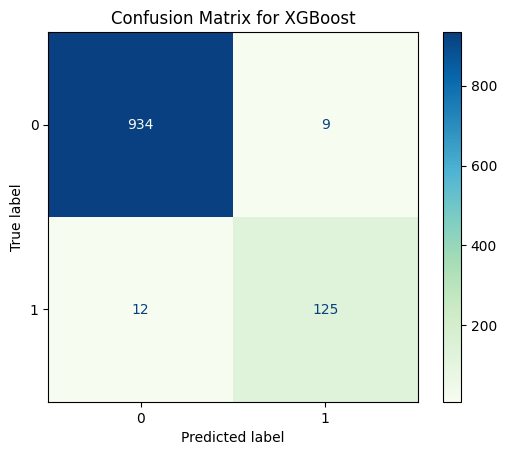

In [50]:
xgb_cm = confusion_matrix(y_test, xgb_pred, labels=xgb.classes_)

rfc_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb.classes_)

rfc_display.plot(values_format='', cmap='GnBu')

plt.title("Confusion Matrix for XGBoost")
plt.show()

For model training, I utilized the count vectorized dataframe, employing both logistic regression and XGBoost algorithms. The evaluation metrics encompassed precision, recall, and area under the curve (AUC) scores. The results indicate superior overall performance for the XGBoost algorithm, boasting a recall score of 91.2%, while logistic regression achieved 87.6% in the same metric.

Further analysis of the confusion matrix revealed specific insights. The XGBoost algorithm exhibited 9 false positives, incorrectly classifying emails as spam when they were ham. Additionally, there were 12 false negatives, where the algorithm misclassified spam emails as ham.

# Summary

In this comprehensive project, we delved into the analysis of spam and ham emails. Our data preprocessing involved a multi-step cleaning process, encompassing lemmatization, stop word removal, and part-of-speech tagging. We explored two different approaches for data transformation: count vectorization and the TF-IDF method.

Moving to model training, we employed two distinct algorithms: logistic regression and the XGBoost classifier. Upon evaluation, the XGBoost algorithm emerged as the superior performer, exhibiting enhanced capabilities in distinguishing between spam and ham emails. It achieved a commendable score compared to logistic regression, particularly excelling with a higher recall score of 91.2%.

Despite the promising performance, the final assessment revealed 21 misclassified emails, indicating areas for improvement. Among these, 12 were false negatives, where spam emails were incorrectly classified as ham, and 9 were false positives, erroneously labeling ham emails as spam.

Given the nature of spam email classification, where prioritizing the identification of spam is crucial, a higher recall score holds paramount importance. To further enhance our model's efficacy, future steps could involve rigorous feature engineering, parameter tuning, and exploring additional techniques for refining the classification accuracy.